In [33]:
import pandas as pd
import numpy as np
from plotnine import *

""
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [50]:
drug_pop = pd.read_csv(
    "/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/20_intermediate_files/drug_shipment_data.csv"
)
drug_pop = drug_pop.drop(columns="Unnamed: 0")

In [51]:
drug_pop.head()

,State Abbr,State,County,FIPS,Year,Total_Weight,Population,PerCapWeight
0,AL,Alabama,Autauga County,1001,2006.0,17100.542225,51328,33316.206018
1,AL,Alabama,Autauga County,1001,2007.0,19152.437289,52405,36546.965535
2,AL,Alabama,Autauga County,1001,2008.0,21785.835290,53277,40891.632957
3,AL,Alabama,Autauga County,1001,2009.0,24439.987693,54135,45146.370543
4,AL,Alabama,Autauga County,1001,2010.0,26169.308158,54773,47777.752100


In [54]:
FL_states = drug_pop["State"].unique()
FL_states = np.delete(FL_states, 1)
FL_states

array(['Alabama', 'Georgia', 'Mississippi', 'South Carolina', 'Tennessee'],
      dtype=object)

In [55]:
FL_policy_year = 2010

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Opioid Shipments: FL_pre_post


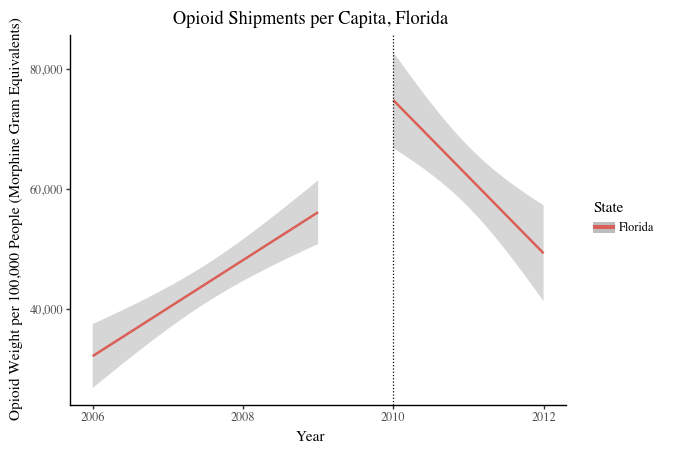

<ggplot: (8765601519641)>


In [56]:
# graph pre-post
p = (
    ggplot()
    + geom_smooth(
        drug_pop.loc[
            (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] < FL_policy_year)
        ],
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_smooth(
        drug_pop.loc[
            (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] >= FL_policy_year)
        ],
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
    + labs(title="Opioid Shipments per Capita, Florida")
    + scale_y_continuous(
        breaks=[40000, 60000, 80000], labels=["40,000", "60,000", "80,000"]
    )
)
ggsave(
    plot=p,
    filename="Opioid Shipments: FL_pre_post",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
    dpi=100,
)

print(p)

In [45]:
# define chosen states as all the states in the dataset


array(['Alabama', 'Georgia', 'Mississippi', 'South Carolina', 'Tennessee'],
      dtype=object)

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DiD/Shipments: Alabama_DD
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DiD/Shipments: Georgia_DD
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/

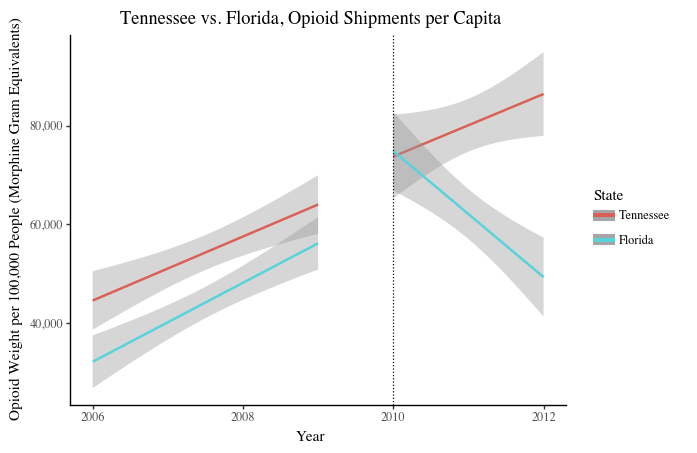

<ggplot: (8765601212109)>


In [57]:
# graph all FL DiDs in a loop


for i in range(len(FL_states)):

    # define dummy variable column
    drug_pop["dummy"] = 0

    drug_pop.loc[
        (drug_pop.State == FL_states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            drug_pop.loc[
                (drug_pop["dummy"] == 1) & (drug_pop["Year"] < FL_policy_year)
            ],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            drug_pop.loc[
                (drug_pop["dummy"] == 1) & (drug_pop["Year"] >= FL_policy_year)
            ],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            drug_pop.loc[
                (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] < FL_policy_year)
            ],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_smooth(
            drug_pop.loc[
                (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] >= FL_policy_year)
            ],
            aes(x="Year", y="PerCapWeight", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
        + labs(title=FL_states[i] + " vs. Florida, Opioid Shipments per Capita")
        + scale_y_continuous(
            breaks=[40000, 60000, 80000], labels=["40,000", "60,000", "80,000"]
        )
    )
    ggsave(
        plot=p,
        filename="Shipments: " + FL_states[i] + "_DD",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DiD",
        dpi=100,
    )

print(p)

In [47]:
# define dummy variable column and state label column
drug_pop["dummy"] = 0
drug_pop["labels"] = 0
label = ", ".join(map(str, FL_states))
for j in range(len(drug_pop)):
    for i in range(len(FL_states)):
        if drug_pop.State[j] == FL_states[i]:
            drug_pop.at[j, "dummy"] = 1
            label = ", ".join(FL_states)
            drug_pop.loc[drug_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Shipments: FL_DiD_aggregates_average


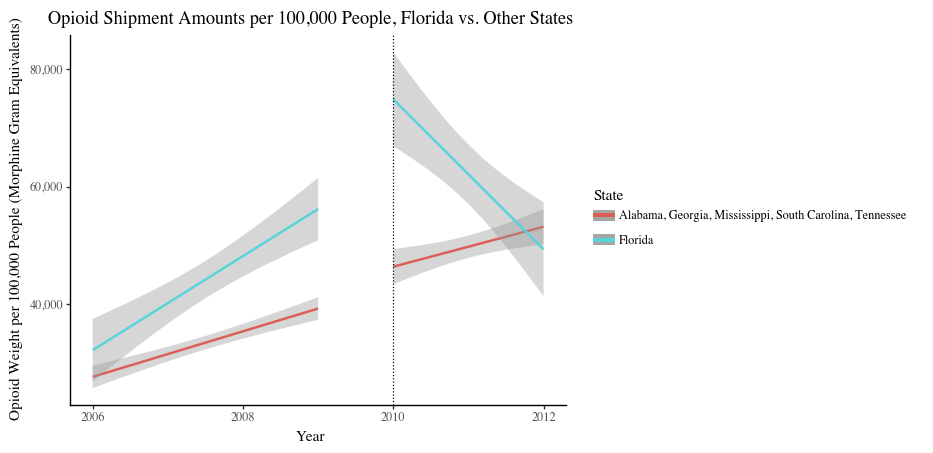

<ggplot: (8765601494377)>


In [48]:
p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        drug_pop.loc[(drug_pop["dummy"] == 1) & (drug_pop["Year"] < FL_policy_year)],
        aes(x="Year", y="PerCapWeight", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        drug_pop.loc[(drug_pop["dummy"] == 1) & (drug_pop["Year"] >= FL_policy_year)],
        aes(x="Year", y="PerCapWeight", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        drug_pop.loc[
            (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] < FL_policy_year)
        ],
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        drug_pop.loc[
            (drug_pop["State Abbr"] == "FL") & (drug_pop["Year"] >= FL_policy_year)
        ],
        aes(x="Year", y="PerCapWeight", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Weight per 100,000 People (Morphine Gram Equivalents)")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2006, 2008, 2010, 2012], limits=[2006, 2012])
    + labs(
        title="Opioid Shipment Amounts per 100,000 People, Florida vs. Other States",
        color="State",
    )
    + scale_y_continuous(
        breaks=[40000, 60000, 80000, 100000],
        labels=["40,000", "60,000", "80,000", "100,000"],
    )
)
ggsave(
    plot=p,
    filename="Shipments: FL_DiD_aggregates_average",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)